In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [21]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/dataset/WorldCupMatches.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

In [ ]:
# Visualización graficos
#COMPARAR EN UN GRAFICO DE BARRAS LOS GOLES DE LOCAL Y VISITA EN EL MUNDIAL DEL 2010
mundial_2010= df[df['Year']== 2010]
goles_local=mundial_2010['Home Team Goals'].sum()
goles_visita=mundial_2010['Away Team Goals'].sum()
#crear el grafico de barras
plt.figure(figsize=(12,9))
plt.bar(['Goles Local','Goles Visita'],[goles_local,goles_visita],color=['blue','red'], label=['local','visita'])
plt.title('Goles de Local y Visita en el Mundial del 2010')
plt.legend()
plt.show()

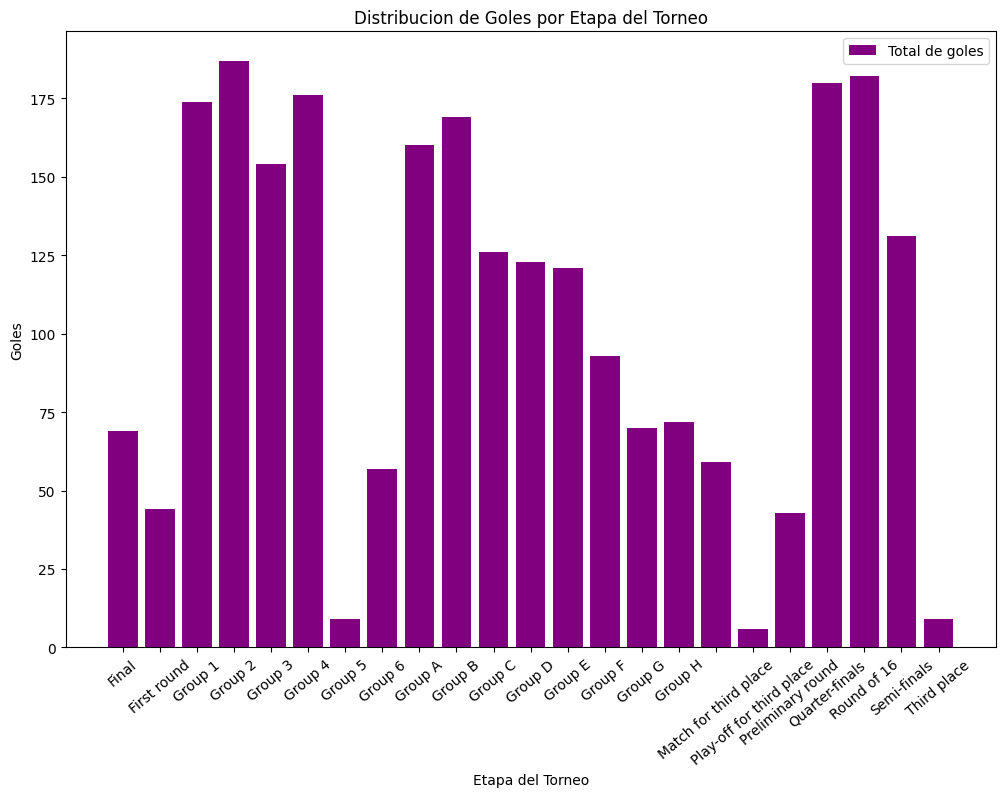

In [ ]:
#Distribución de Goles por Etapa del Torneo
df_fases=df.groupby('Stage')[['Home Team Goals', 'Away Team Goals']].sum().reset_index()
total_goles=df_fases['Home Team Goals']+df_fases['Away Team Goals']
#figura
plt.figure(figsize=(12,8))
plt.bar(df_fases['Stage'],total_goles, color='purple', label='Total de goles')
plt.title('Distribucion de Goles por Etapa del Torneo')
plt.xlabel('Etapa del Torneo')
plt.xticks(rotation=40)
plt.ylabel('Goles')
plt.legend()
plt.show()

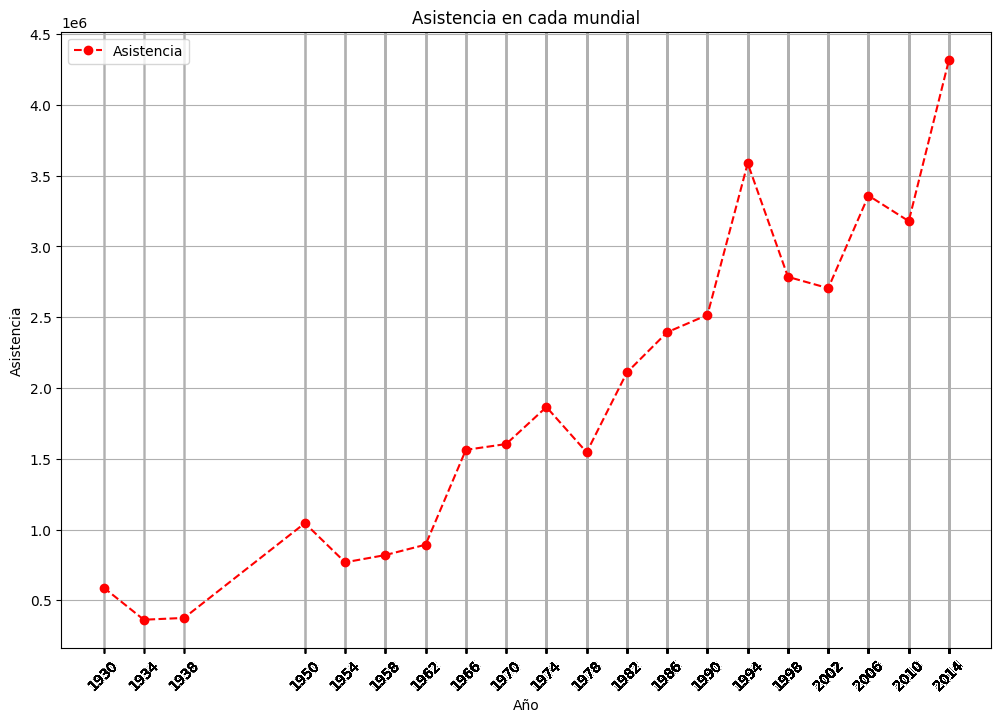

In [ ]:
#la asistencia en cada mundial
asistencia_pormundial=df.groupby('Year')['Attendance'].sum().reset_index() #reset_index convierte el índice antiguo en una columna nueva.
#figura
plt.figure(figsize=(12,8))
plt.plot(asistencia_pormundial['Year'],asistencia_pormundial['Attendance'],marker='o', linestyle='--', color='red', label='Asistencia')
plt.title('Asistencia en cada mundial')
plt.xlabel('Año')
plt.xticks(df['Year'],rotation=45)
plt.ylabel('Asistencia')
plt.grid(True)
plt.legend()
plt.show()

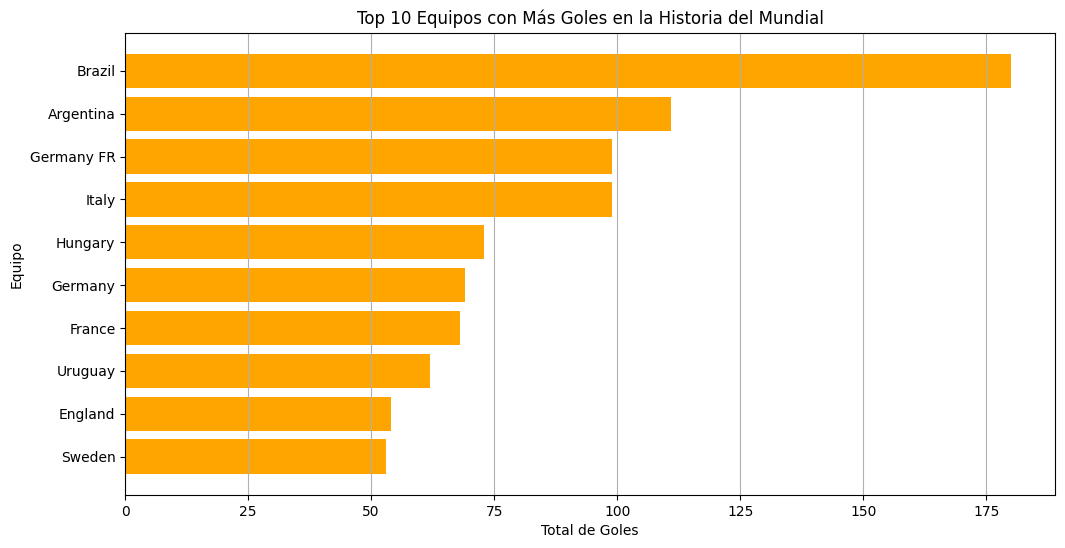

In [ ]:
#Equipos con más Goles en la Historia del Mundial
df_equipos = df.groupby("Home Team Name")[["Home Team Goals"]].sum()
df_equipos = df_equipos.rename(columns={"Home Team Goals": "Total Goles"})
df_equipos = df_equipos.sort_values(by="Total Goles", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.barh(df_equipos.index, df_equipos["Total Goles"], color='orange')
plt.title("Top 10 Equipos con Más Goles en la Historia del Mundial")
plt.xlabel("Total de Goles")
plt.ylabel("Equipo")
plt.gca().invert_yaxis()  # Para que el equipo con más goles esté arriba
plt.grid(axis="x")
plt.show()

Error medio absoluto: 249489350787.40656
Coeficiente de determinacion: 0.8559408915846399


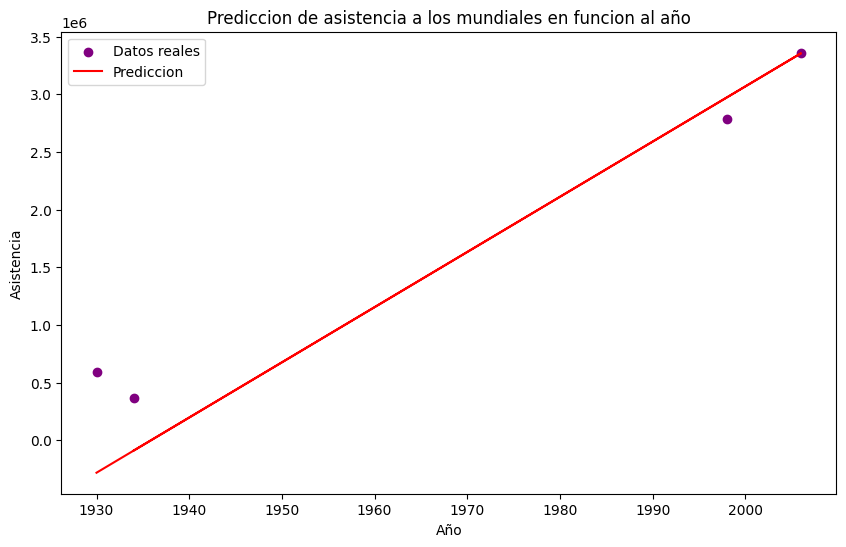

In [25]:
#predecir Asistencia a los mundiales en función del año.
#seleccionar columnas relevantes
suma_asistencia=df.groupby('Year')[['Attendance']].sum()
#Definir variables
x = suma_asistencia.index.values.reshape(-1, 1) #VI AÑO
y = suma_asistencia['Attendance'].values #VD ASISTENCIA
#Dividir conjunto en entrenamiento y prueba
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

#Crear y entrenar el modelo
model=LinearRegression()
model.fit(x_train,y_train)

#Hacer la prediccion
y_pred=model.predict(x_test)
#Evaluacion del modelo
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Error medio absoluto: {mse}")
print(f"Coeficiente de determinacion: {r2}")

#Grafico
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test, color='purple', label='Datos reales')
plt.plot(x_test, y_pred, color='red', label='Prediccion')
plt.title('Prediccion de asistencia a los mundiales en funcion al año')
plt.xlabel('Año')
plt.ylabel('Asistencia')
plt.legend()
plt.show()

